In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import sqrt

import data
import phi

In [2]:
# Collect the data from each of the sources
sparcGalaxies = data.GetGalaxyData("data/Sparc/Rotmod_LTG/")
xueSofueGalaxies = data.GetGalaxyData("data/XueSofue/")

In [3]:
# Get the galaxies we want from each source
NGC5371 = np.array(sparcGalaxies['NGC5371_rotmod'])
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])

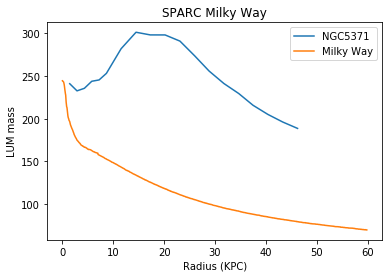

In [4]:
# Plot both galaxies side by side
NGC5371_rad = NGC5371[:,0]
NGC5371_gas = NGC5371[:,3]
NGC5371_disk = NGC5371[:,4]
NGC5371_bulge = NGC5371[:,5]

NGC5371_lum = np.sqrt(NGC5371_gas*NGC5371_gas + NGC5371_disk*NGC5371_disk + NGC5371_bulge*NGC5371_bulge)

kpc_MW = MWXueSofue[:,0]
vobs_MW = MWXueSofue[:,1]
plt.plot(NGC5371_rad, NGC5371_lum, kpc_MW, vobs_MW)
plt.legend(['NGC5371', 'Milky Way', 'cubic'], loc='best')
plt.xlabel('Radius (KPC)')
plt.ylabel('LUM mass')
plt.title('SPARC Milky Way')
plt.show()

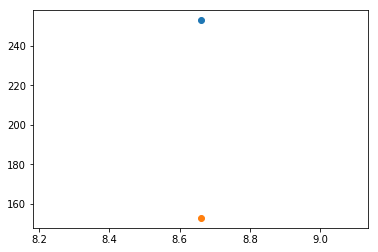

In [5]:
# Interpolation Test
mw_function = interp1d(kpc_MW, vobs_MW, kind='cubic')

NG_rad = NGC5371_rad[5]
NG_y = NGC5371_lum[5]

plt.plot(NG_rad, NG_y, 'o', NG_rad, mw_function(NG_rad), 'o')
plt.show()

# We Now have the interpolators! #
This allows us to get milky way values at any radius! 
Now we get phi for the other galaxy, then get phi for the Milky Way with the same radii as the other galaxy.

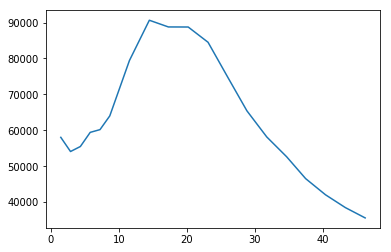

In [12]:
NGC_vSquared = NGC5371_gas*NGC5371_gas + NGC5371_disk*NGC5371_disk + NGC5371_bulge*NGC5371_bulge
# Plot our function of r -> vSquared
plt.plot(NGC5371_rad, NGC_vSquared)
plt.show()

In [13]:
NGC_phi = phi.CalcWithRadiiAndVSquared(NGC5371_rad, NGC_vSquared)

AttributeError: 'list' object has no attribute 'CalcWithRadiiAndVSquared'

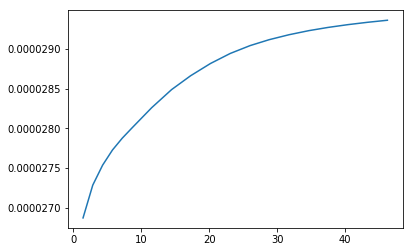

In [10]:
plt.plot(NGC5371_rad, phi)
plt.show()